# Exploring Swedish macroeconomic data 


> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#%pip install matplotlib-venn
from matplotlib_venn import venn2
from statsmodels.tsa.statespace.sarimax import SARIMAX


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

In [12]:
filename = 'data/Bachelor-data.xlsx' # open the file (read)
df = pd.read_excel(filename)
df.rename(columns={'Unnamed: 0':'year'}, inplace = True) # rename the unnamed year column to year (clean)



# Exploring the dataset 

<AxesSubplot:title={'center':'Swedish Phillips-curve 1990Q1-2020Q1'}, xlabel='Unemployment rate', ylabel='CPI'>

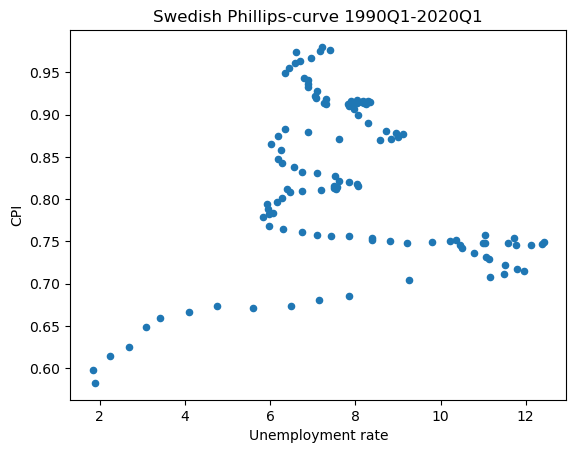

In [13]:
df.plot.scatter(x = 'Unemployment rate', y = 'CPI',title='Swedish Phillips-curve 1990Q1-2020Q1')

In [14]:
l =[]
for j, i in enumerate(df.year.values):

    if j%4==0 :
        pass
    else:
        i = '' 
    l.append(i)
l = np.array(l)    


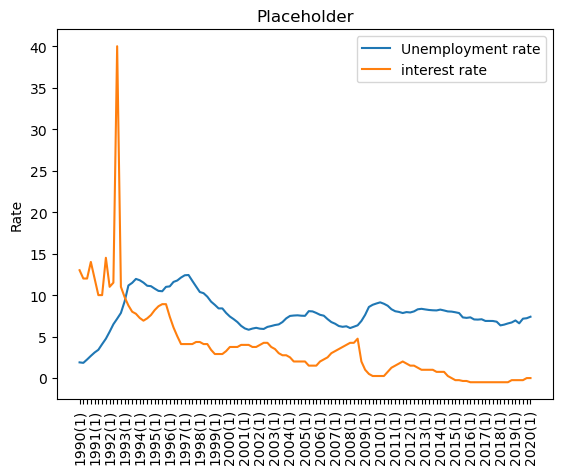

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['year'],df['Unemployment rate'], label = 'Unemployment rate')
ax.plot(df['year'],df['Central bank key interest rate'], label = 'interest rate')
ax.set_xticklabels(l,rotation= 90)
ax.set_ylabel('Rate')
ax.set_title('Placeholder')
ax.legend(loc='upper right')
plt.show()

# Next we make an interactive plot

In [16]:
df.head()

,year,Unemployment rate,"Total employment, growth",Central bank key interest rate,CPI,"Private consumption, growth","Private final consumption, volume","Government consumption, growth","Government consumption, volume","GDP, growth","GDP, volume, market prices",taxes
0,1990(1),1.892148,2.088404,13.0,0.582506,-1.774361,1.311207e+12,0.662149,1.000694e+12,3.329849,2.862875e+12,80882000000
1,1990(2),1.834398,-0.190191,12.0,0.597940,0.015974,1.311259e+12,4.054171,1.010685e+12,-0.823700,2.856961e+12,80882000000
2,1990(3),2.239930,-0.647835,12.0,0.613972,0.369953,1.312470e+12,4.459397,1.021769e+12,-1.217066,2.848228e+12,80882000000
3,1990(4),2.674546,-1.067817,14.0,0.624987,0.401483,1.313786e+12,4.451488,1.032955e+12,-1.338543,2.838649e+12,80882000000
4,1991(1),3.082225,-1.268186,12.0,0.648426,1.800577,1.319660e+12,5.899233,1.047864e+12,-1.431285,2.828437e+12,73101000000


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
def _plot_timeseries(dataframe, variable):
    
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    variable = list(variable)
    
    x = dataframe.year.values
    y = dataframe[variable].values
    

    ax.plot(x,y)
    if len(variable) != 1:

        title = ' and '.join(variable)
    else:
        title = variable[0]
    ax.set_title(title)
    ax.set_xticklabels(l,rotation= 90)  
    plt.show()  
    
def plot_timeseries(dataframe):
    
    widgets.interact(_plot_timeseries, 
    dataframe = widgets.fixed(dataframe),
    variable = widgets.SelectMultiple(
        description='variable', 
        options=['Unemployment rate','Total employment, growth','Central bank key interest rate','CPI','Private consumption, growth','Private final consumption, volume', 'Government consumption, growth', 'Government consumption, volume', 'GDP, growth','GDP, volume, market prices','taxes'], 
        value=['CPI']),
    ); 

In [19]:
plot_timeseries(df)

interactive(children=(SelectMultiple(description='variable', index=(3,), options=('Unemployment rate', 'Total …

Explain what you see when moving elements of the interactive plot around. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

In [20]:
df[['Unemployment rate','Central bank key interest rate','CPI']].describe()

,Unemployment rate,Central bank key interest rate,CPI
count,121.000000,121.000000,121.000000
mean,7.774373,3.835950,0.819862
std,2.152264,4.943223,0.095128
min,1.834398,-0.500000,0.582506
25%,6.586716,0.750000,0.748994
50%,7.539960,2.900000,0.815023
75%,8.570999,4.250000,0.912874
max,12.423479,40.000000,0.979983


Some interresting explaination of the above `Unemployment rate`, `interest rate` and `CPI`

# Conclusion

ADD CONCISE CONLUSION.